In [5]:
import numpy as np
"""
The carrying capacity of the Iguana Population
"""

capacity = 1611013

"""
The growth rate of the Iguana population per year
"""

yearlyGrowthRate = 1.552

"""
The growth rate of the Iguana population per month
"""

growthRate = 0.0812

"""
The control rate of iguanas per step
"""

controlRate = 0.4

"""
A empty list that contain all iterations of our model
"""

history = []

"""
An array creating Flordia in Cayman-Island sized chunks to represent a cellular automaton
"""

rows = 36
cols = 12
florida = np.zeros((rows,cols))

"""
initializing some iguanas in florida at time 0
"""

florida[33,11] = 15000
florida[32,11] = 15000
florida[31,11] = 15000
florida[33,10] = 15000
florida[32,10] = 15000
florida[31,10] = 15000
florida[32,9] = 15000
florida[31,9] = 15000
florida[32,8] = 15000
florida[32,7] = 15000
florida[32,6] = 15000
florida[31,9] = 15000

In [6]:
# Basic control strategy, cellular automaton
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import numpy as np
from math import exp
from math import ceil
import copy
from IPython.display import clear_output
import decimal

"""
A function that models the population growth of Iguanas in a cellular
automaton using the Bayesian State-Space Model.
Arguments:
Current- Cellular automaton which contains the initialized system
growthRate - (constant float) the growth rate of the population
capacity - (int) the carrying capacity of the Iguana population
steps - (constant int) total number of steps wished to be used to find the population
controlRate - (constant float) the rate at which iguanas are removed from the population via external control
returns the final array containing the cellular automaton at all steps
"""
def BSSModelLoopBase(Current, growthRate, capacity, steps, controlRate):

  # makes a deep copy to not alter the initialization
  initial = copy.deepcopy(Current)
  size = initial.shape
  rows = size[0]
  cols = size[1]
  history = np.zeros((steps+1,rows,cols))
  history[0] = initial
  for i in range(steps):
    for j in range(rows):
      for k in range(cols):
        # updates population based on our state space model
        initial[j,k]= initial[j,k] + (growthRate*initial[j,k]*(1-(initial[j,k]/(capacity*((j+35)/70))))) - ((controlRate/12)*initial[j,k])
    for j in range(rows):
      for k in range(cols):
        denominator_spt = np.exp((-(1/(0.2*(capacity*((j+35)/70)))))*(initial[j,k]-((capacity*((j+35)/70))/2)))
        odds = 1/(1+denominator_spt)
        # need at least 2 iguanas to spread
        if initial[j,k] >= 2:
          # checking edge cases for spread
          if k+1<cols:
            if initial[j,k+1] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j,k+1]
          if j+1<rows:
            if initial[j+1,k] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j+1,k] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k]
          if k-1>=0:
            if initial[j,k-1] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j,k-1]
          if j-1>=0:
            if initial[j-1,k] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j-1,k] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k]
          if j+1<rows and k+1<cols:
            if initial[j+1,k+1] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j+1,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k+1]
          if j-1>=0 and k+1<cols:
            if initial[j-1,k+1] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j-1,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k+1]
          if j+1<cols and k-1>=0:
            if initial[j+1,k-1] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j+1,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k-1]
          if j-1>=0 and k-1>=0:
            if initial[j-1,k-1] == 0:
              if random.random() < odds:
                # picks a number of iguanas to spread
                initial[j-1,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k-1]
    history[i+1] = initial
    displayAutomaton(i, history)
    print("On month %r (Year %r)" % (i, floor(i/12)))
  return history

"""
A function to graph the population in a given cell versus time
"""
def graphCell(history,row,col):
  timeList =[]
  stepList = []
  for i in range(history.shape[0]):
    timeList.append(i);
  for i in range(history.shape[0]):
    stepList.append(history[i,row,col])
  plt.plot(timeList, stepList)
  plt.xlabel("Months")
  plt.ylabel("Population")
  plt.title("Populations versus Time")
  plt.show()
"""
A function to display the cellular automaton at a certain iteration
"""
def displayAutomaton(step, array):
  # makes a deep copy to prevent altering the original
  history = copy.deepcopy(array)
  # finds the maximum value 
  max = np.amax(history[step,:,:])
  # scales to fit in the range [0,255]
  divide = max/255
  history[step,:,:] = history[step,:,:]/divide
  # rounds up to integers
  for i in range(history.shape[1]):
    for j in range(history.shape[2]):
      history[steps,i,j] = ceil(history[steps,i,j])
  # turns array into image
  to_image = history[step,:,:].astype(np.uint8)
  # clears previous image
  clear_output(wait=True)
  plt.figure()
  plt.imshow(im.fromarray(to_image))
  # makes the colorbar show the actual population values
  norm = mpl.colors.Normalize(vmin=0, vmax=max) 
  cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm))
  plt.show()


In [7]:
#Moderate control strategy
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import numpy as np
from math import exp
from math import ceil
import copy
from IPython.display import clear_output
import decimal

"""
A function that models the population growth of Iguanas in a cellular
automaton using the Bayesian State-Space Model.
Arguments:
Current- Cellular automaton which contains the initialized system
growthRate - (constant float) the growth rate of the population
capacity - (int) the carrying capacity of the Iguana population
steps - (constant int) total number of steps wished to be used to find the population
controlRate - (constant float) the rate at which iguanas are removed from the population via external control
returns the final array containing the cellular automaton at all steps
"""

def BSSModelLoop(Current, growthRate, capacity, steps, controlRate):

  # makes a deep copy to not alter the initialization
  initial = copy.deepcopy(Current)
  size = initial.shape
  rows = size[0]
  cols = size[1]
  history = np.zeros((steps+1,rows,cols))
  history[0] = initial
  tracker = np.zeros((rows,cols))
  for i in range(steps):
    for j in range(rows):
      for k in range(cols):
        # checks if we have reached the threshold for this cell, adds 12 months of aggressive control if so
        if initial[j,k] >= ((capacity*((j+35)/70))/5):
          tracker[j,k] = tracker[j,k] + 12
        # if we are implementing aggressive control..
        if tracker[j,k] >= 0:
          # much stronger control strategy
          initial[j,k]= initial[j,k] + (growthRate*initial[j,k]*(1-(initial[j,k]/(capacity*((j+35)/70))))) - (controlRate*initial[j,k])
          tracker[j,k] = tracker[j,k] - 1
        # otherwise, regular strategy
        else:
          initial[j,k]= initial[j,k] + (growthRate*initial[j,k]*(1-(initial[j,k]/(capacity*((j+35)/70))))) - ((controlRate/12)*initial[j,k])
    for j in range(rows):
      for k in range(cols):
        denominator_spt = np.exp((-(1/(0.2*(capacity*((j+35)/70)))))*(initial[j,k]-((capacity*((j+35)/70))/2)))
        odds = 1/(1+denominator_spt)
        # need at least 2 iguanas to spread
        if initial[j,k] >= 2:
          # checking edge cases
          if k+1<cols:
            if initial[j,k+1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j,k+1]
          if j+1<rows:
            if initial[j+1,k] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j+1,k] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k]
          if k-1>=0:
            if initial[j,k-1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j,k-1]
          if j-1>=0:
            if initial[j-1,k] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j-1,k] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k]
          if j+1<rows and k+1<cols:
            if initial[j+1,k+1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j+1,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k+1]
          if j-1>=0 and k+1<cols:
            if initial[j-1,k+1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j-1,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k+1]
          if j+1<cols and k-1>=0:
            if initial[j+1,k-1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j+1,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k-1]
          if j-1>=0 and k-1>=0:
            if initial[j-1,k-1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j-1,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k-1]
    history[i+1] = initial
    displayAutomaton(i, history)
    print("On month %r (Year %r)" % (i, floor(i/12)))
  return history

"""
A function to graph the population in a given cell versus time
"""
def graphCell(history,row,col):
  timeList =[]
  stepList = []
  for i in range(history.shape[0]):
    timeList.append(i);
  for i in range(history.shape[0]):
    stepList.append(history[i,row,col])
  plt.plot(timeList, stepList)
  plt.xlabel("Months")
  plt.ylabel("Population")
  plt.title("Populations versus Time")
  plt.show()
"""
A function to display the cellular automaton at a certain iteration -- still working on this implementation
"""
def displayAutomaton(step, array):
  # makes a deep copy to prevent altering the original
  history = copy.deepcopy(array)
  # finds the maximum value 
  max = np.amax(history[step,:,:])
  # scales to fit in the range [0,255]
  divide = max/255
  history[step,:,:] = history[step,:,:]/divide
  # rounds up to integers
  for i in range(history.shape[1]):
    for j in range(history.shape[2]):
      history[steps,i,j] = ceil(history[steps,i,j])
  # turns array into image
  to_image = history[step,:,:].astype(np.uint8)
  # clears previous image
  clear_output(wait=True)
  plt.figure()
  plt.imshow(im.fromarray(to_image))
  # makes the colorbar show the actual population values
  norm = mpl.colors.Normalize(vmin=0, vmax=max) 
  cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm))
  plt.show()


In [8]:
#Trying to see if I can make a cellular automaton here
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import numpy as np
from math import exp
from math import ceil
import copy
from IPython.display import clear_output
import decimal

"""
A function that models the population growth of Iguanas in a cellular
automaton using the Bayesian State-Space Model.
Arguments:
Current- Cellular automaton which contains the initialized system
growthRate - (constant float) the growth rate of the population
capacity - (int) the carrying capacity of the Iguana population
steps - (constant int) total number of steps wished to be used to find the population
controlRate - (constant float) the rate at which iguanas are removed from the population via external control
returns the final array containing the cellular automaton at all steps
"""

def BSSModelLoop2(Current, growthRate, capacity, steps, controlRate):

  # makes a deep copy to not alter the initialization
  initial = copy.deepcopy(Current)
  size = initial.shape
  rows = size[0]
  cols = size[1]
  history = np.zeros((steps+1,rows,cols))
  history[0] = initial
  tracker = np.zeros((rows,cols))
  for i in range(steps):
    for j in range(rows):
      for k in range(cols):
        # checks if we have reached the threshold for this cell, adds 12 months of aggressive control if so
        if initial[j,k] >= ((capacity*((j+35)/70))/50):
          tracker[j,k] = tracker[j,k] + 12
        # if we are implementing aggressive control..
        if tracker[j,k] >= 0:
          # much stronger control strategy
          initial[j,k]= initial[j,k] + (growthRate*initial[j,k]*(1-(initial[j,k]/(capacity*((j+35)/70))))) - (controlRate*initial[j,k])
          tracker[j,k] = tracker[j,k] - 1
        # otherwise, regular strategy
        else:
          initial[j,k]= initial[j,k] + (growthRate*initial[j,k]*(1-(initial[j,k]/(capacity*((j+35)/70))))) - ((controlRate/12)*initial[j,k])
    for j in range(rows):
      for k in range(cols):
        denominator_spt = np.exp((-(1/(0.2*(capacity*((j+35)/70)))))*(initial[j,k]-((capacity*((j+35)/70))/2)))
        odds = 1/(1+denominator_spt)
        # need at least 2 iguanas to spread
        if initial[j,k] >= 2:
          # checking edge cases
          if k+1<cols:
            if initial[j,k+1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j,k+1]
          if j+1<rows:
            if initial[j+1,k] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j+1,k] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k]
          if k-1>=0:
            if initial[j,k-1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j,k-1]
          if j-1>=0:
            if initial[j-1,k] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j-1,k] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k]
          if j+1<rows and k+1<cols:
            if initial[j+1,k+1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j+1,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k+1]
          if j-1>=0 and k+1<cols:
            if initial[j-1,k+1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j-1,k+1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k+1]
          if j+1<cols and k-1>=0:
            if initial[j+1,k-1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j+1,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j+1,k-1]
          if j-1>=0 and k-1>=0:
            if initial[j-1,k-1] == 0:
                # picks a number of iguanas to spread
              if random.random() < odds:
                initial[j-1,k-1] = min(ceil((random.random())*(1/100)*initial[j,k]),initial[j,k]-1)
                initial[j,k]= initial[j,k] - initial[j-1,k-1]
    history[i+1] = initial
    displayAutomaton(i, history)
    print("On month %r (Year %r)" % (i, floor(i/12)))
  return history

"""
A function to graph the population in a given cell versus time
"""
def graphCell(history,row,col):
  timeList =[]
  stepList = []
  for i in range(history.shape[0]):
    timeList.append(i);
  for i in range(history.shape[0]):
    stepList.append(history[i,row,col])
  plt.plot(timeList, stepList)
  plt.xlabel("Months")
  plt.ylabel("Population")
  plt.title("Populations versus Time")
  plt.show()
"""
A function to display the cellular automaton at a certain iteration -- still working on this implementation
"""
def displayAutomaton(step, array):
  # makes a deep copy to prevent altering the original
  history = copy.deepcopy(array)
  # finds the maximum value 
  max = np.amax(history[step,:,:])
  # scales to fit in the range [0,255]
  divide = max/255
  history[step,:,:] = history[step,:,:]/divide
  # rounds up to integers
  for i in range(history.shape[1]):
    for j in range(history.shape[2]):
      history[steps,i,j] = ceil(history[steps,i,j])
  # turns array into image
  to_image = history[step,:,:].astype(np.uint8)
  # clears previous image
  clear_output(wait=True)
  plt.figure()
  plt.imshow(im.fromarray(to_image))
  # makes the colorbar show the actual population values
  norm = mpl.colors.Normalize(vmin=0, vmax=max) 
  cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm))
  plt.show()


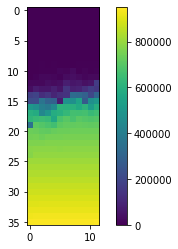

On month 599 (Year 49)


In [9]:
from math import floor
from PIL import Image as im
from google.colab.patches import cv2_imshow
steps = 600
historybase = BSSModelLoopBase(florida,growthRate,capacity,steps,controlRate)

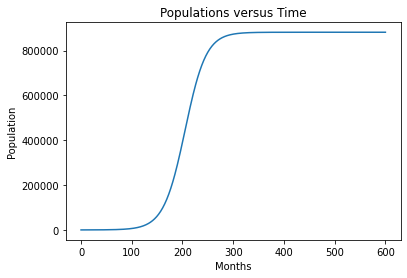

In [10]:
graphCell(historybase, 30, 8)

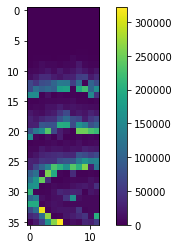

On month 599 (Year 49)


In [11]:
from math import floor
from PIL import Image as im
from google.colab.patches import cv2_imshow
steps = 600
history = BSSModelLoop(florida,growthRate,capacity,steps,controlRate)

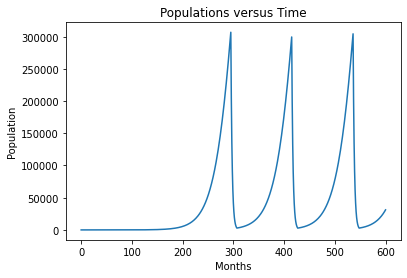

In [12]:
graphCell(history, 30, 8)

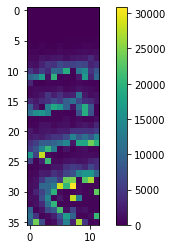

On month 599 (Year 49)


In [13]:
from math import floor
from PIL import Image as im
from google.colab.patches import cv2_imshow
steps = 600
history2 = BSSModelLoop2(florida,growthRate,capacity,steps,controlRate)

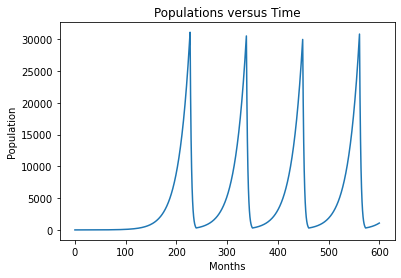

In [14]:
graphCell(history2, 30, 8)